In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd

# 파일 경로
file_path = "play.csv"

# 데이터 불러오기 (인코딩 명시)
df = pd.read_csv(file_path, encoding='cp949')

# 데이터프레임 확인
df.head()


,관광지명,관광지구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,운동및오락시설정보,...,지원시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
0,일제 경성호국신사 계단(108계단),관광지,서울특별시 용산구 신흥로22가길 33,서울특별시 용산구 용산동2가 1-346,37.546023,126.982542,237.2,승강기,NaN,NaN,...,NaN,1905-04-26,20,0,"일제강점기 경성호국신사에 참배하기 위해 오르던 진입로로, 완공까지 한국인들의 재산과...",02-2199-7240,서울특별시 용산구청 문화체육과,2022-12-07,3020000,서울특별시 용산구
1,찬바람재,관광지,서울특별시 용산구 녹사평대로 195,서울특별시 용산구 용산동2가 7-99,37.534815,126.987014,646.6,승강기,NaN,NaN,...,NaN,2000-12-15,50,0,예전부터 겨울철 찬바람이 매섭게 몰아친다 하여 찬바람재 또는 한풍재라고도 불리던 곳...,02-2199-7240,서울특별시 용산구청 문화체육과,2022-12-07,3020000,서울특별시 용산구
2,옛 남영동 대공분실(민주인권기념관),관광지,서울특별시 용산구 한강대로71길 37,서울특별시 용산구 갈월동 98-8,37.541012,126.971634,6391.0,화장실,NaN,NaN,...,NaN,2024-12-01,430,0,1970~80년대 민주주의를 억압하며 악명을 떨쳤던 남영동 대공분실은 1976년 지...,031-361-9576,민주화운동기념사업회,2022-12-07,3020000,서울특별시 용산구
3,옛 용산공설시장(현 남영아케이드),관광지,서울특별시 용산구 한강대로84길 7,서울특별시 용산구 남영동 28-8,37.543723,126.972924,1449.0,화장실,NaN,NaN,...,NaN,1920-01-01,100,0,1922년 일제가 설치한 시장으로 지금은 남영아케이드로 불리고 있다.,02-2199-7240,서울특별시 용산구청 문화체육과,2022-12-07,3020000,서울특별시 용산구
4,전쟁기념관,관광지,서울특별시 용산구 이태원로 29,서울특별시 용산구 용산동1가 8,37.537314,126.978466,112887.2,화장실+주차장+물품보관함+수유실,NaN,NaN,...,NaN,1994-06-10,7500,150,1994년 용산에 건립된 전쟁기념관은 외침을 극복하고 국민의 생명과 재산을 지켜온 ...,02-709-3114,전쟁기념사업회,2022-12-07,3020000,서울특별시 용산구


/tmp/ipykernel_12993/2410711542.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.fillna(0, inplace=True)  # 결측치 0으로 대체 (실제 데이터에 따라 다를 수 있음)


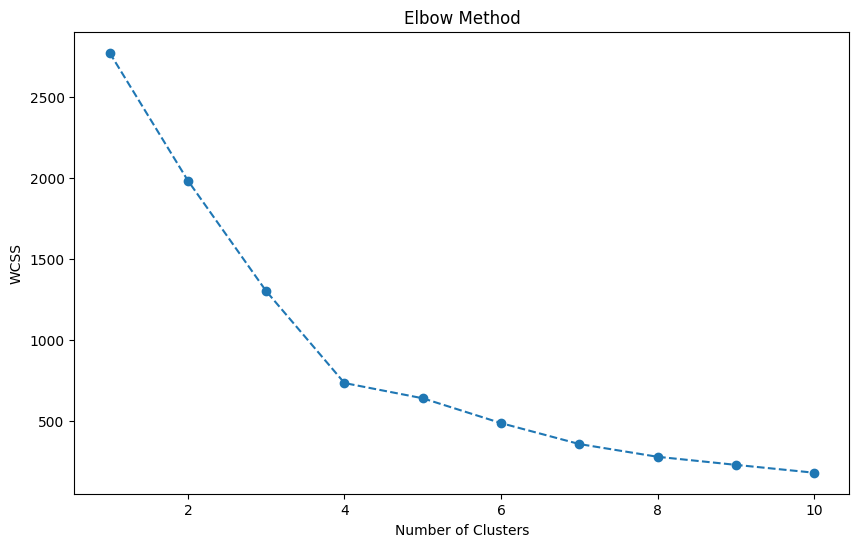

Cluster Centers:
Cluster 1: [3.26089693e+05 8.24443348e+03 3.10758315e+02]
Cluster 2: [185015.76327273 654545.45454545   2477.54545455]
Cluster 3: [2.22703261e+07 1.92909091e+04 9.08909091e+02]
Average Silhouette Score: 0.9087439618078009


/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_f

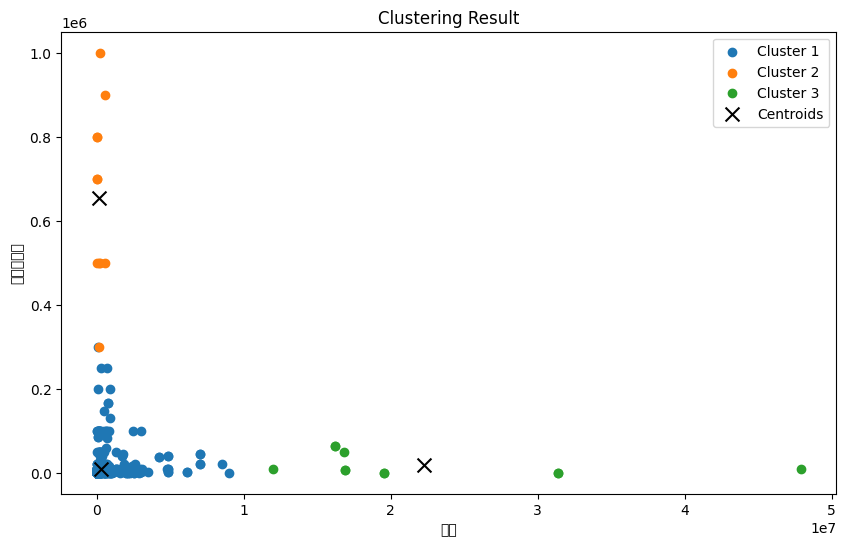

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 데이터 불러오기
df = pd.read_csv(file_path, encoding='cp949')

# 필요한 열 선택 (예시)
selected_columns = ['면적', '수용인원수', '주차가능수']

# 선택한 열만 추출하여 새로운 데이터프레임 생성
selected_df = df[selected_columns]

# 데이터 전처리: 결측치 처리 및 정규화
selected_df.fillna(0, inplace=True)  # 결측치 0으로 대체 (실제 데이터에 따라 다를 수 있음)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_df)

# K-means 클러스터링 수행
wcss = []  # Within-Cluster Sum of Squares 저장할 리스트

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# 엘보우 방법을 사용하여 최적의 클러스터 수 K 결정
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 최적의 클러스터 수를 선택하여 K-means 클러스터링 다시 수행
optimal_k = 3  # 예시로 3으로 설정
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# 클러스터링 결과를 원본 데이터프레임에 추가
df['Cluster'] = kmeans.labels_

# 각 클러스터의 중심점을 출력
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: {center}")

# 실루엣 점수 계산
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"Average Silhouette Score: {silhouette_avg}")

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = selected_df[kmeans.labels_ == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster+1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', s=100, label='Centroids')
plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.title('Clustering Result')
plt.legend()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import folium

# 데이터 불러오기
df = pd.read_csv(file_path, encoding='cp949')
# 데이터 확인
print(df.head())

# 위도와 경도 변수 선택
X = df[['위도', '경도']]

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5)  # 예시로 클러스터 수를 5개로 설정
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# 클러스터링 결과 시각화
map_clusters = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=10)

# 클러스터별로 관광지 표시
colors = ['red', 'blue', 'green', 'purple', 'orange']  # 클러스터별 색상 지정
for lat, lon, cluster in zip(df['위도'], df['경도'], df['Cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)

# 지도 출력
map_clusters.save('cluster_map.html')  # 결과를 HTML 파일로 저장
map_clusters


                  관광지명 관광지구분              소재지도로명주소                소재지지번주소  \
0  일제 경성호국신사 계단(108계단)   관광지  서울특별시 용산구 신흥로22가길 33  서울특별시 용산구 용산동2가 1-346   
1                 찬바람재   관광지   서울특별시 용산구 녹사평대로 195   서울특별시 용산구 용산동2가 7-99   
2  옛 남영동 대공분실(민주인권기념관)   관광지  서울특별시 용산구 한강대로71길 37     서울특별시 용산구 갈월동 98-8   
3   옛 용산공설시장(현 남영아케이드)   관광지   서울특별시 용산구 한강대로84길 7     서울특별시 용산구 남영동 28-8   
4                전쟁기념관   관광지     서울특별시 용산구 이태원로 29      서울특별시 용산구 용산동1가 8   

          위도          경도        면적           공공편익시설정보 숙박시설정보 운동및오락시설정보  ...  \
0  37.546023  126.982542     237.2                승강기    NaN       NaN  ...   
1  37.534815  126.987014     646.6                승강기    NaN       NaN  ...   
2  37.541012  126.971634    6391.0                화장실    NaN       NaN  ...   
3  37.543723  126.972924    1449.0                화장실    NaN       NaN  ...   
4  37.537314  126.978466  112887.2  화장실+주차장+물품보관함+수유실    NaN       NaN  ...   

  지원시설정보        지정일자 수용인원수 주차가능수  \
0    NaN  1905-04-26    20

In [18]:
import folium

# 지도 초기 위치 설정 (대한민국 중심)
map_center = [36.5, 127.5]

# 지도 생성
map_osm = folium.Map(location=map_center, zoom_start=7)

# 데이터프레임의 위치 정보를 지도에 마커로 표시
for idx, row in df.iterrows():
    latitude = row['위도']
    longitude = row['경도']
    phone_number = row['관리기관전화번호']  # 관리기관전화번호로 변경
    location_name = row['관광지명']
    popup_text = f"{location_name}: 전화번호 - {phone_number}"  # 팝업 텍스트에 전화번호 추가
    folium.Marker([latitude, longitude], popup=popup_text).add_to(map_osm)

# 지도를 HTML 파일로 저장
map_osm.save("tourist_spots_map.html")

# 지도를 출력
map_osm


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: U

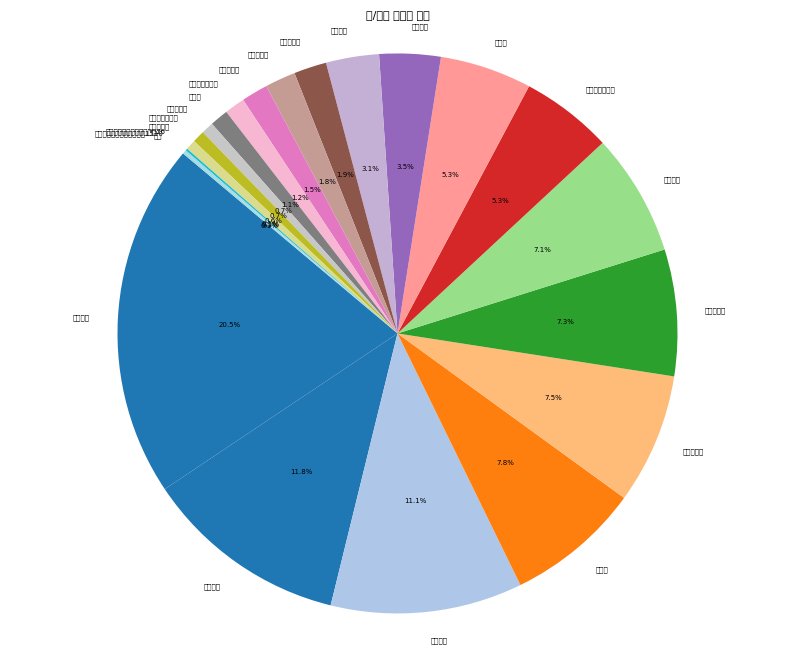

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 불러오기 (경로에 raw string 처리)
# 데이터셋 불러오기 (encoding 매개변수 설정)
df = pd.read_csv(file_path, encoding='euc-kr')
# 결측값이 포함된 행 제거
df = df.dropna(subset=['소재지도로명주소'])

# 소재지도로명주소에서 시/도 정보를 추출하는 함수
def extract_province(address):
    return address.split()[0]

# 주어진 데이터프레임에서 시/도 정보를 추출하여 새로운 열을 추가합니다.
df['시도'] = df['소재지도로명주소'].apply(extract_province)

# 각 시/도의 관광지 수를 계산합니다.
province_counts = df['시도'].value_counts()

# 파이 그래프를 그립니다.
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.labelsize'] = 8  # x, y 축 레이블
plt.rcParams['axes.titlesize'] = 8  # 그래프 제목
plt.figure(figsize=(10, 8))
province_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('시/도별 관광지 분포')
plt.ylabel('')  # y축 라벨 제거
plt.axis('equal')  # 원형 그래프로 설정
plt.show()


In [30]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_name = fm.FontProperties(fname=font_path[0]).get_name()
plt.rcParams['font.family'] = font_name


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: U

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Malgun Gothic' not found.
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/s

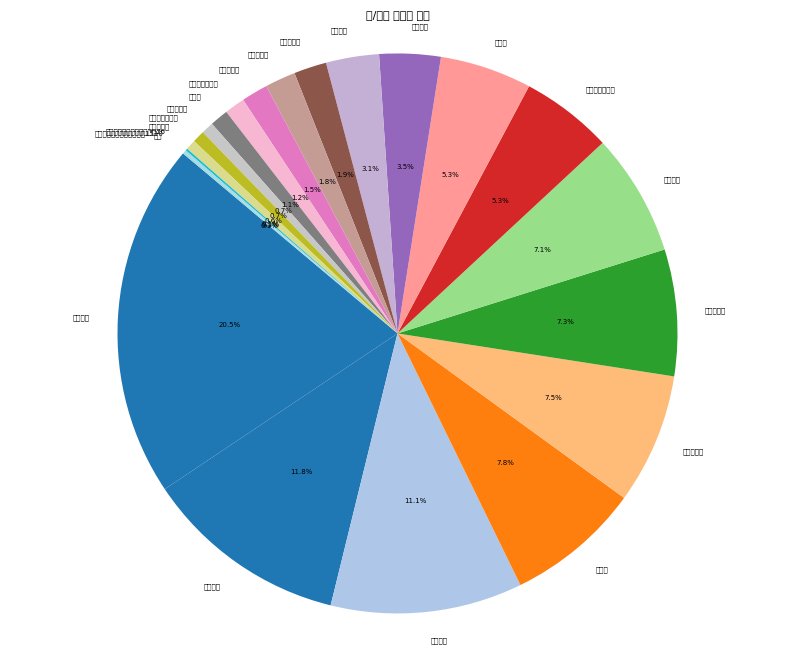

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 불러오기 (경로에 raw string 처리)
# 데이터셋 불러오기 (encoding 매개변수 설정)
df = pd.read_csv(file_path, encoding='euc-kr')
# 결측값이 포함된 행 제거
df = df.dropna(subset=['소재지도로명주소'])

# 소재지도로명주소에서 시/도 정보를 추출하는 함수
def extract_province(address):
    return address.split()[0]

# 주어진 데이터프레임에서 시/도 정보를 추출하여 새로운 열을 추가합니다.
df['시도'] = df['소재지도로명주소'].apply(extract_province)

# 각 시/도의 관광지 수를 계산합니다.
province_counts = df['시도'].value_counts()

# 파이 그래프를 그립니다.
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.labelsize'] = 8  # x, y 축 레이블
plt.rcParams['axes.titlesize'] = 8  # 그래프 제목
plt.figure(figsize=(10, 8))
province_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('시/도별 관광지 분포')
plt.ylabel('')  # y축 라벨 제거
plt.axis('equal')  # 원형 그래프로 설정
plt.show()
